# Practical: Introduction to Keras for classification (correction)

During this practical, you will learn **how to build a deep neural nerwork with Keras** in order to solve basic **classification problems**. Keras is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, R, or Theano. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

This practical is divided in two parts: You will first learn the different steps necessary to build a neural network in order to solve a well-known classification problem. Afterwards, you will build your own deep-learning neural network to classify gene expression data.

# 1. Application on MNIST


The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is also widely used for training and testing in the field of deep and machine learning.

## 1.1 Overview of the MNIST database

The main python libraries such as `numpy` are already pre-installed on Google colab. Some of them will be useful for us along the exercises, so we need to import them into the first cell.






In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

*   `numpy` library adds support for large, multi-dimensional arrays and contains a large collection of mathematical functions to operate on these arrays.
*   `matplotlib` is the main library used for plotting.
* sklearn contains machine-learning function such as `TSNE`.

1.1.0. Import the `keras` library.

In [ ]:
import keras
import tensorflow as tf

1.1.1. Store the content of the mnist dataset in variables. The mnist can be find in `keras.datasets`.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


1.1.2. Have a look at these variables. Why is the database splitted into training and test datasets? What is the interval of x and y respectively? (Use `np.min()` and `np.max()` functions) Can you guess what x and y represent?

In [ ]:
print(f'x ranging between {np.min(x_train)} and {np.max(x_train)}')

x ranging between 0 and 255


In [ ]:
print(f'y ranging between {np.min(y_train)} and {np.max(y_train)}')

y ranging between 0 and 9


A model (e.g. a neural network or a naive Bayes classifier) is trained on the **training dataset** (approximately 3/4 of the data) using a supervised learning method. The **test dataset** (approximately 1/4 of the data) is used to provide an unbiased evaluation of a final model fit on the training dataset.

Each dataset consists of pairs of an **input vector x** and the corresponding **output vector y** (also called **labels**). In our case, x is an array of grayscale image data ranging between 0 and 255, while y is an array of digit labels, integers in range 0-9.

1.1.3. How many digits (images) are stored in each dataset? What are the dimensions for an image? Use the `.shape` class method.

In [ ]:
train_shape = x_train.shape
test_shape = x_test.shape
print(train_shape)
print(test_shape)

(60000, 28, 28)
(10000, 28, 28)


60,000 digits are stored in the training dataset and 10,000 in the test dataset. The dimensions of an image are 28x28 (rowsxcolumns).

1.1.4. Use `np.random.randint()` to pick a random digit from the `x_train` dataset and then plot its content with `plt.imshow()` function from the `matplotlib` library. Print the corresponding label.

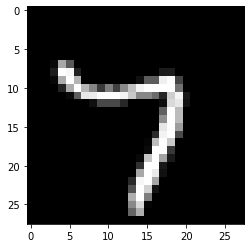

In [ ]:
random_digit = np.random.randint(train_shape[0])
plt.imshow(x_train[random_digit, :, :], cmap='gray')

In [ ]:
print('label:', y_train[random_digit])

label: 7


## 1.2. Data pre-processing

1.2.1. Before training a neural network, the data have to be pre-processed. First, data need to be **converted into arrays**, but that was already the case when we imported the MNIST data. Then, the Nd arrays (here, 3d arrays: images, width, height) have to be **flattened into 2d arrays** by reshaping width and height into a single dimension in our case (use `.reshape()` function). Then, in order to make the learning easier by a network, the grayscale values (intergers ranging between 0 and 255) have to be converted into **low floating point values** (ranging between 0 and 1).

In [ ]:
x_train = x_train.reshape(train_shape[0], train_shape[1]*train_shape[2]) # flattened array
x_train = x_train / 255 # low floating point
train_shape = x_train.shape

In [ ]:
x_test = x_test.reshape(test_shape[0], test_shape[1]*test_shape[2]) # flattened array
x_test = x_test / 255 # low floating point
test_shape = x_test.shape

1.2.2. The label arrays have to be converted into binary class arrays for the training, for this purpose use `to_categorical()` function from `keras.utils`.

In [ ]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

## 1.3. t-SNE recap

1.3.1. Apply **t-SNE** on the test dataset (you can use `TSNE()` already imported from sklearn library).

In [ ]:
tsne = TSNE(n_components=2, verbose=1)
tsne_res = tsne.fit_transform(x_test)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.046s...
[t-SNE] Computed neighbors for 10000 samples in 176.182s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.030838
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.367111
[t-SNE] KL divergence after 1000 iterations: 1.798371


1.3.2. Generate a vector containing 10 different colors, one for each digit (`plt.get_cmap()` can help to do the job).

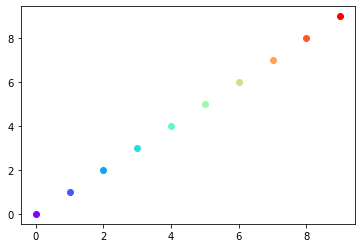

In [ ]:
num_colors = 10
colors = plt.get_cmap('rainbow', num_colors)
for i in range(num_colors):
    plt.plot(i, i, 'o', c=colors(i))

1.3.3. Plot the t-SNE colored by labels with `plt.scatter()`. In order to easily identify the clusters, it is more convenient to plot the digit label instead of a usual circle. For this purpose, you can use `plt.annotate()` and the `marker=None` option in the scatter plot.

Text(0, 0.5, 'tsne-two')

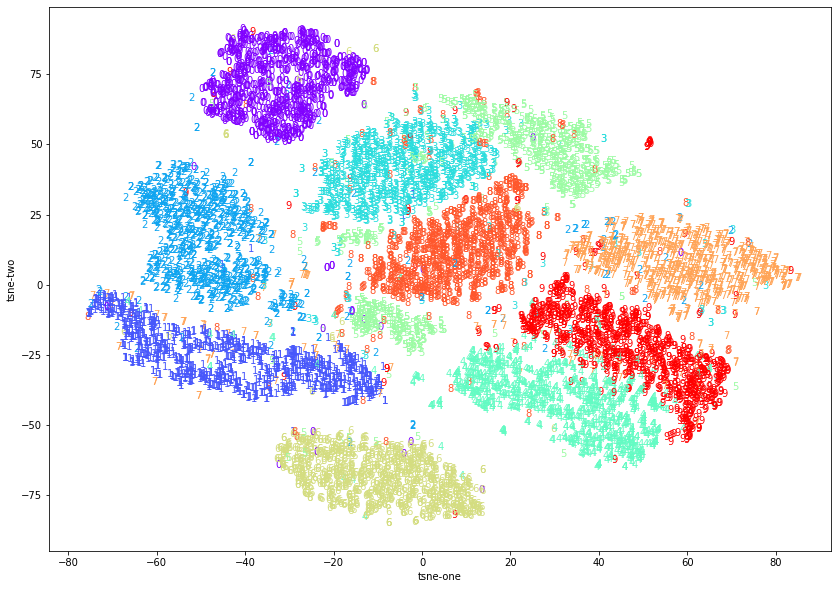

In [ ]:
fig = plt.figure(figsize=(14,10))
plt.scatter(tsne_res[:, 0], tsne_res[:, 1], marker='None')

for i, digit in enumerate(y_test):
    plt.annotate(digit, (tsne_res[i, 0], tsne_res[i, 1]), color=colors(digit), fontsize=10)
plt.xlabel('tsne-one')
plt.ylabel('tsne-two')

1.3.4. Observe the clusters obtained by the t-SNE. Are these clusters well separated? Can you observe digits classified in the wrong cluster? Give one or two examples.


In general, these clusters are well separated. However, many digits are misclassified. For instance, 7 can be classified as 1 by the t-SNE, 6 can be classified as 0.

## 1.4. Deep-Learning network

The core data structure of Keras is a **model**, a way to organize **layers**. The simplest type of model is the sequential model, a linear stack of layers. We begin by creating a sequential model and then adding layers one by one. Each layer need a **number of units** and an **activation function** as parameters.

1.4.1. In the following model, fill the `input_shape` value in the first layer and the number of `units` in the last layer.

In [ ]:
model = keras.Sequential() 
model.add(keras.layers.Dense(units=256, activation='relu', input_shape=(train_shape[1], )))
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=len(np.unique(y_train)), activation='softmax'))

1.4.2. `model.summary()` gives an overview of the model. How many layers and what type of layers does this model have?

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


This model has 5 layers, a Dense layer is followed by a Dropout layer.

After building your model, you have to compile it with a **loss function** and an **optimizer**. Categorical cross-entropy loss is used for multi-class classification.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics=['accuracy'])

Once the model has been **structured** and **compiled**, it is ready to be **trained**. To start this process the **initial weights are chosen randomly**. Then, the training begins. In **supervised training**, the network processes the inputs and compares its resulting outputs against the desired outputs (labels). Errors are then propagated back through the system, causing the system to **adjust the weights** which control the network. This process occurs over and over as the weights are continually tweaked. During the training of a network the training dataset is processed many times as the connection weights are ever refined.

In [ ]:
history = model.fit(x_train, y_train_cat, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 4s 8ms/step - loss: 0.4286 - accuracy: 0.8704 - val_loss: 0.1758 - val_accuracy: 0.9470
Epoch 2/30
375/375 [==============================] - 3s 7ms/step - loss: 0.2029 - accuracy: 0.9405 - val_loss: 0.1240 - val_accuracy: 0.9634
Epoch 3/30
375/375 [==============================] - 3s 7ms/step - loss: 0.1541 - accuracy: 0.9546 - val_loss: 0.1107 - val_accuracy: 0.9690
Epoch 4/30
375/375 [==============================] - 3s 7ms/step - loss: 0.1303 - accuracy: 0.9622 - val_loss: 0.0967 - val_accuracy: 0.9733
Epoch 5/30
375/375 [==============================] - 3s 7ms/step - loss: 0.1142 - accuracy: 0.9671 - val_loss: 0.0936 - val_accuracy: 0.9752
Epoch 6/30
375/375 [==============================] - 3s 7ms/step - loss: 0.1036 - accuracy: 0.9702 - val_loss: 0.0903 - val_accuracy: 0.9761
Epoch 7/30
375/375 [==============================] - 3s 7ms/step - loss: 0.0984 - accuracy: 0.9712 - val_loss: 0.0902 - val_accuracy: 0.9765
Epoch 

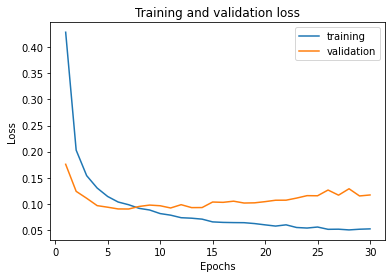

In [ ]:
x_axis = np.arange(1, len(history.history['loss'])+1)
plt.plot(x_axis, history.history['loss'], label='training')
plt.plot(x_axis, history.history['val_loss'], label='validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

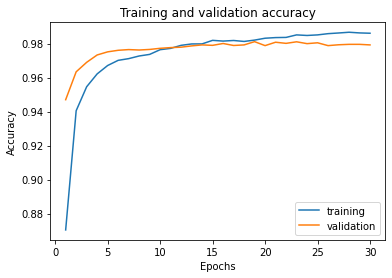

In [ ]:
x_axis = np.arange(1, len(history.history['accuracy'])+1)
plt.plot(x_axis, history.history['accuracy'], label='training')
plt.plot(x_axis, history.history['val_accuracy'], label='validation')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

1.4.3. Explain in your words what could be epochs, batch_size parameters and the validation dataset.

An **epoch** refers to one cycle through the full training dataset. The **batch_size** is the total number of training samples present in a single batch. The dataset has to be divided into batches because it is not possible to pass the entire dataset into the neural network at once. The **validation dataset** is the sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.

> Indented block



1.4.4. Describe the behaviour of accuracy and loss curves. Is your model underfitting or overfitting? Do you think your model is well-trained?

Accuracy curves increased fast until ~0.96 at 8 epochs and then stabilized. Loss curves decreased fast until ~0.1 at 8 epochs and then start overfitting. Overfitting occurs when you achieve a good fit of your model on the training data while it does not generalize/predict well on unseen data (validation data set).

Once your model has been trained, you can **predict labels** from other datasets:

In [ ]:
y_pred_test = model(x_test).numpy()

`y_pred_test` stores for each image the probability of being one of these 10 digits. Among these 10 probabilities, we choose the highest for each image as the final prediction.

In [ ]:
y_pred_test = np.argmax(y_pred_test, axis=1)

The final and not negligible step of building a deep neural network is the **evaluation of its performances**. Several metrics can be computed for this goal, but we will focus on the **accuracy** for now, which represents the proportion of correctly classified data.

1.4.5. Compute the accuracy metrics based on `y_pred_test` and `y_test` vectors.

In [ ]:
acc_test = np.sum(y_pred_test == y_test) / test_shape[0]
print(acc_test)

0.982


The **accuracy** and **loss** metrics can also be computed on the test dataset with the `evaluate()` Keras function:

In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9820


[0.10017272084951401, 0.9819999933242798]

Note that there is **no relationship between the loss and the accuracy metrics**. Loss can be seen as a distance between the true values and the values predicted by the model. Greater the loss is, more huge is the errors you made on the data.

To summarize:  
- A low accuracy and huge loss means you made huge errors on a lot of data  
- A low accuracy but low loss means you made little errors on a lot of data  
- A great accuracy with low loss means you made low errors on a few data (best case)

1.4.6. What can you say about your model's performance?


This model has good performances because the accuracy is close to 1 and the loss close to 0, which means that the model made low errors on a few data.

1.4.7. Modify the model by changing the number of layers and number of nodes in each layer then compile, train and evaluate this new model. Compare the performance with the previous model. Which one seems better to solve this classification problem?


# 2. Application on gene expression data

The gene expression level of N genes were measured in M patients. We would like to group these genes by transcriptional identities. In our example, there are 13 potential transcriptional identities: AMTL, AMKL-(I to III), MK-(I to V), MPAL-B/M, inv(16), t(8;21) and 11q23 rearranged. We provided for you a table of gene expression data (`gene_exp`) and the vector of trancriptional identities or labels (`transcrip_id`). The result of the t-SNE for the most variant 100 genes of each cohort is also available.

According to your recent knowledge on deep-learning for classification, build a neural network to classify gene expression data.

You can follow these steps as a guide to help you build your neural network:  
  - Take a look and try to understand the data. How many genes, how many patients, look at the t-SNE plot, etc.  
  - Split your data into a training (about 75% of the initial dataset) and a test dataset (about 25%).  
  - Pre-process these data: Convert tables into arrays, normalize the data (make the values for each gene to be in the range between 0 and 1, use the min-max scaling), convert the strings of the label vector into integers and then vectors into binary class matrices.   
  - Build your neural network with 2 to 4 dense layers containing 64 to 512 (try discrete values of 64, 128, 256 and 512) nodes with dropout layers in between.    
  - Compile your model with the categorical crossentropy loss function and the rmsprop optimizer (the learning rate `lr` must be low, try 0.0005 or smaller, what happens if the learning rate is larger? The learning rate can be specified as `optimizer_rmsprop(lr=0.0005)`).  
  - Train your model with 600 (or more) epochs, notice is overfitting is happening.  
  - Evaluate your model on the test dataset.  
  - Optimize and train your model until you get good accuracy and loss value. Try to achieve something in the order of 80-85% of accuracy on the training data and 65-75% accuracy on the test dataset.  

**Optional question:** Predict labels of the test set and plot the t-SNE colored by these predicted labels to identify clusters of transcriptional identity.


## Import data

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import keras
import tensorflow as tf

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gene_exp_filename ='drive/MyDrive/practical_DL/data_exercise2/NB4120_RNA_use.txt'
clinical_filename = 'drive/MyDrive/practical_DL/data_exercise2/NB4120_RNA_clinical_use.txt'

# Import data frame of gene expression data:
gene_exp = pd.read_csv(gene_exp_filename, sep='\t')
gene_exp = gene_exp.T # Invert rows with columns

# Import data frame of clinical information:
clinical = pd.read_csv(clinical_filename, sep='\t')

# Result of the t-SNE on gene expression data:
tsne_res = clinical[['tSNE.x', 'tSNE.y']]

# Vector of Transcriptional identities = Labels
transcrip_id = clinical['Transcriptional.Identity']
transcrip_id_names = np.sort(np.unique(transcrip_id))

In [ ]:
gene_exp

,FAM138A,OR4F5,OR4F29,OR4F16,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,ISG15,AGRN,C1orf159,TTLL10,TNFRSF18,TNFRSF4,SDF4,B3GALT6,FAM132A,UBE2J2,SCNN1D,ACAP3,PUSL1,CPSF3L,GLTPD1,TAS1R3,DVL1,MXRA8,AURKAIP1,CCNL2,RP4-758J18.2,MRPL20,ANKRD65,TMEM88B,VWA1,ATAD3C,ATAD3B,ATAD3A,TMEM240,SSU72,...,IL9R,WASH6P,SRY,TGIF2LY,PCDH11Y,TSPY2,AMELY,TBL1Y,TSPY4,TSPY8,TSPY3,TSPY1,TSPY10,GYG2P1,VCY1B,VCY,CDY2B,CDY2A,HSFY1,HSFY2,RPS4Y2,CYorf17,RBMY1B,RBMY1A1,RBMY1E,RBMY1D,PRY2,RBMY1F,RBMY1J,PRY,BPY2,DAZ1,DAZ2,PRYP3,CDY1B,BPY2B,DAZ3,DAZ4,BPY2C,CDY1
CDD.1,-6.590485,-6.629573,-6.698666,-6.746083,-6.497573,0.822561,-1.582596,-6.299421,-0.478499,4.569289,1.626709,-2.299112,-1.113431,-6.455312,-1.398003,0.211963,1.437466,0.325461,0.215832,2.010109,-0.388113,0.647080,-1.509475,1.783048,0.450683,-2.331948,0.827037,-3.000760,2.031415,3.616807,0.363926,2.521856,-6.404920,-6.618980,-6.338414,-3.978481,0.683705,-0.295752,-6.718224,2.301637,...,1.678446,1.386798,-6.678497,-6.626855,-6.480644,-6.623088,-6.619651,-6.712106,-6.626827,-6.630163,-6.624386,-6.633267,-6.637963,-6.631237,-6.621165,-6.622263,-6.629400,-6.628759,-6.623415,-6.622564,-6.587285,-6.626562,-6.625848,-6.627648,-6.628058,-6.627165,-6.624911,-6.624726,-6.624641,-6.623316,-6.628016,-6.620786,-6.616618,-6.623458,-6.627338,-6.630822,-6.620849,-6.610837,-6.628502,-6.623991
CDD.2,-6.589362,-6.628942,-6.698015,-3.610410,-3.964644,2.491821,-0.702865,-6.298622,-4.760899,1.374914,0.566463,-2.073417,-0.186046,-2.270744,-0.567712,-0.111431,1.473411,0.712736,-0.955918,1.099948,0.374126,1.407729,0.242032,2.160974,0.280136,-1.921416,1.252662,-4.376737,2.567832,3.701068,0.526460,2.535253,-3.481657,-3.711102,-6.337639,-3.097565,1.804748,2.221916,-3.065970,2.451910,...,2.993002,0.719101,-6.677855,-6.626223,-6.479674,-6.622454,-6.618429,-6.711377,-6.626193,-6.629532,-6.623733,-6.632636,-6.637332,-6.630502,-6.620440,-6.621493,-6.628769,-6.628126,-6.622718,-6.621837,-6.586517,-6.625931,-6.625217,-6.627017,-6.627426,-6.626534,-6.624276,-6.624094,-6.624010,-6.622683,-6.627385,-6.619949,-6.615488,-6.622827,-6.626706,-6.630191,-6.620085,-6.608874,-6.627871,-6.623359
CDD.3,-6.595745,-6.632529,-6.701712,-6.749189,-2.223618,1.492510,-1.181716,-6.303160,-6.671425,-1.447510,3.996690,-2.181261,-1.578652,-3.018514,1.973214,0.027973,1.353010,0.328324,-3.060938,0.453729,-0.636281,0.066665,-0.469287,0.730618,-0.163726,-2.494443,0.268505,-5.792238,1.310485,2.356145,-0.222372,1.148647,-5.319136,-4.555923,-2.382568,-4.129197,-0.067557,0.320886,-6.721803,1.428048,...,2.722490,0.281659,-6.681504,-6.629810,-6.485185,-6.626054,-6.625372,-6.715521,-6.629794,-6.633119,-6.627446,-6.636222,-6.640919,-6.634676,-6.624560,-6.625867,-6.632356,-6.631722,-6.626679,-6.625970,-6.590883,-6.629518,-6.628803,-6.630603,-6.631013,-6.630121,-6.627886,-6.627682,-6.627597,-6.626278,-6.630971,-6.624701,-6.621908,-6.626416,-6.630293,-6.633777,-6.624426,-6.620024,-6.631458,-6.626950
CDD.4,-6.598251,-6.633937,-4.377230,-4.979115,-6.502971,1.982946,0.072788,-5.702446,-6.270761,-4.475017,2.615441,-1.252859,-1.596944,-6.460750,-1.768672,-0.973931,2.448733,0.339937,-1.364707,1.306877,-3.951914,0.475294,0.053904,1.717814,0.164243,-2.237095,0.597988,-3.508841,1.601803,3.685523,-0.034810,1.919869,-5.651997,-6.624418,-6.343769,-4.883736,1.129405,1.224622,-4.127253,2.873880,...,-0.656353,-0.586740,-6.682937,-6.631219,-6.487349,-6.627467,-6.628098,-6.717148,-6.631208,-6.634527,-6.628904,-6.637630,-6.642327,-6.636315,-6.626178,-6.627585,-4.601349,-4.598574,-6.628234,-6.627593,-5.291639,-5.687338,-6.630212,-6.632012,-6.632421,-6.631529,-6.629303,-6.629090,-6.629005,-6.627690,-6.632380,-6.626567,-6.624429,-6.627825,-4.789484,-6.635186,-6.626130,-6.624403,-6.632866,-5.044235
CDD.5,-6.598556,-6.634109,-6.703341,-6.088333,-4.521168,1.704947,0.114735,-5.403392,-2.970040,1.874550,4.645103,-0.642650,-0.914251,-3.909478,-1.529663,-0.360357,1.899569,0.948659,-0.892147,1.493752,-0.632757,1.148156,0.250623,1.693569,0.605857,-1.959981,0.750165,-3.298620,2.104861,3.772912,0.056839,1.

How many patients? How many genes?

In [ ]:
num_patients = gene_exp.shape[0]
num_genes = gene_exp.shape[1]
print(f'There are {num_patients} patients and {num_genes:,} genes.')

There are 436 patients and 19,384 genes.


Result of the t-SNE colored by the Transcriptional identity:

In [ ]:
tsne_res

,tSNE.x,tSNE.y
CDD.1,-17.668371,87.973546
CDD.2,-9.358434,77.480482
CDD.3,-2.251928,68.481258
CDD.4,-7.494854,86.200424
CDD.5,-8.702268,83.301825
...,...,...
CDD.432,-36.284260,100.475237
CDD.433,-12.639045,66.942743
CDD.434,-37.041095,90.009947
CDD.435,-6.280583,72.925579


In [ ]:
transcrip_id

CDD.1      AMTL
CDD.2      AMTL
CDD.3      AMTL
CDD.4      AMTL
CDD.5      AMTL
           ... 
CDD.432    AMTL
CDD.433    AMTL
CDD.434    AMTL
CDD.435    AMTL
CDD.436    AMTL
Name: Transcriptional.Identity, Length: 436, dtype: object

Text(0, 0.5, 'tsne-two')

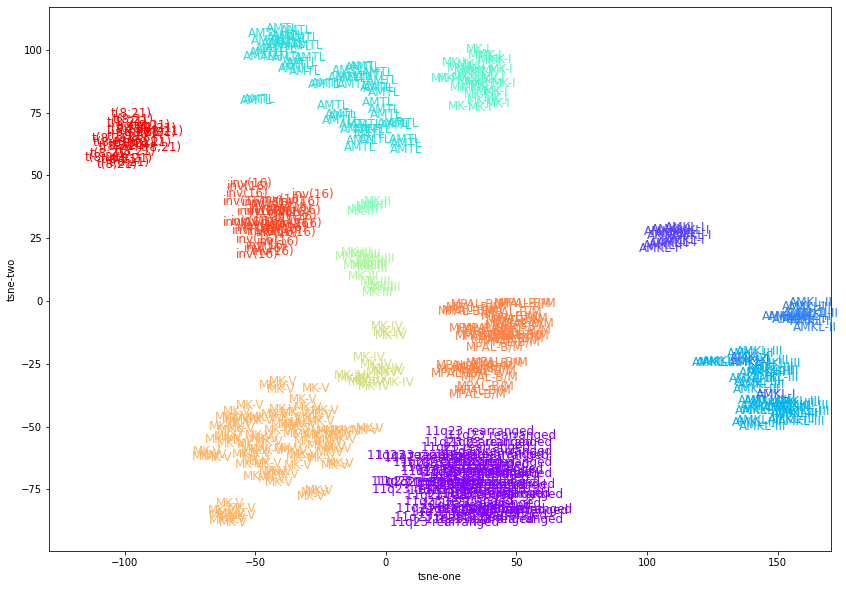

In [ ]:
colors = plt.get_cmap('rainbow', len(transcrip_id_names))

fig = plt.figure(figsize=(14,10))
plt.scatter(tsne_res['tSNE.x'], tsne_res['tSNE.y'], marker='None')

for i, id in enumerate(transcrip_id):
    where = np.where(transcrip_id_names==id)[0][0]
    plt.annotate(id, (tsne_res['tSNE.x'][i], tsne_res['tSNE.y'][i]), color=colors(where), fontsize=12)
plt.xlabel('tsne-one')
plt.ylabel('tsne-two')

## Split the dataset

In [ ]:
ind_shuffle = random.sample(list(range(num_patients)), num_patients)
train_size = int(0.75*num_patients) # 75% of the sample size

x_train = gene_exp.iloc[ind_shuffle][:train_size]
y_train = transcrip_id.iloc[ind_shuffle][:train_size]

x_test = gene_exp.iloc[ind_shuffle][train_size:]
y_test = transcrip_id.iloc[ind_shuffle][train_size:]

In [ ]:
print(f'{x_train.shape[0]} patients in the training dataset.')
x_train

327 patients in the training dataset.


,FAM138A,OR4F5,OR4F29,OR4F16,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,ISG15,AGRN,C1orf159,TTLL10,TNFRSF18,TNFRSF4,SDF4,B3GALT6,FAM132A,UBE2J2,SCNN1D,ACAP3,PUSL1,CPSF3L,GLTPD1,TAS1R3,DVL1,MXRA8,AURKAIP1,CCNL2,RP4-758J18.2,MRPL20,ANKRD65,TMEM88B,VWA1,ATAD3C,ATAD3B,ATAD3A,TMEM240,SSU72,...,IL9R,WASH6P,SRY,TGIF2LY,PCDH11Y,TSPY2,AMELY,TBL1Y,TSPY4,TSPY8,TSPY3,TSPY1,TSPY10,GYG2P1,VCY1B,VCY,CDY2B,CDY2A,HSFY1,HSFY2,RPS4Y2,CYorf17,RBMY1B,RBMY1A1,RBMY1E,RBMY1D,PRY2,RBMY1F,RBMY1J,PRY,BPY2,DAZ1,DAZ2,PRYP3,CDY1B,BPY2B,DAZ3,DAZ4,BPY2C,CDY1
CDD.270,-6.596243,-6.632809,-5.537345,-5.562024,-1.628457,1.815290,-1.006662,-4.319681,-4.826499,-0.722122,1.395770,1.008209,-0.120607,-3.306721,-0.110882,0.986592,3.103755,0.834492,-0.167274,2.567453,-0.135637,2.241335,-1.348987,2.199315,0.827749,-2.443860,1.007684,-2.841525,2.774431,4.252404,-0.601021,2.015631,-6.409531,-5.203145,-3.854125,-3.752880,1.358430,1.718675,-2.938146,2.777618,...,-0.799818,1.023995,-6.681789,-6.630090,-5.627850,-6.626335,-6.625914,-2.904967,-6.630075,-6.633399,-6.627736,-6.636502,-6.641199,-2.996772,-6.624881,-6.626209,-6.632636,-6.632003,-6.626988,-6.626293,-6.591224,-6.629798,-6.629083,-6.630883,-6.631293,-6.630401,-6.628168,-6.627961,-6.627877,-6.626559,-6.631251,-6.625072,-6.622409,-6.626696,-6.630573,-6.634057,-6.624765,-6.620895,-6.631737,-6.627230
CDD.378,-6.594117,-6.631614,-6.700769,-6.748228,-2.367664,2.680055,0.143029,-6.302003,-6.670492,-5.225529,3.493352,-1.725205,-0.317289,-6.457855,-6.195736,-4.884313,2.089253,1.183944,-3.839935,1.414090,-0.185304,1.130001,0.834059,2.140839,0.331394,-2.160204,2.118854,-1.301668,3.201425,3.161637,1.496320,2.927887,-3.650069,-6.621523,-1.358838,-4.447628,1.066846,1.752984,-6.720695,2.425383,...,-3.044135,-0.553997,-6.680573,-6.628896,-6.483780,-6.625136,-6.623601,-6.714464,-6.628876,-6.632204,-6.626499,-6.635307,-6.640004,-6.633612,-6.623509,-6.624752,-6.631441,-6.630805,-6.625669,-6.624916,-6.589769,-6.628603,-6.627889,-6.629689,-6.630098,-6.629206,-6.626965,-6.626767,-6.626682,-6.625361,-6.630057,-6.623489,-6.620271,-6.625501,-6.629379,-6.632863,-6.623319,-6.617181,-6.630543,-6.626034
CDD.52,-6.595634,-6.632467,-3.748894,-4.764350,-4.837027,0.667319,-0.210885,-0.066847,-5.598380,-1.119408,3.584355,1.907751,-0.214365,-5.520726,1.952911,1.539378,2.654584,0.362307,-1.095947,1.847735,-1.905581,0.247082,-0.330893,1.178429,0.356285,-3.425060,1.187899,-5.357696,1.382077,3.176750,0.595725,1.480561,-3.202206,-6.622585,-1.367496,-4.031219,-0.202087,-0.347058,-6.721728,2.393970,...,-1.497379,2.105376,-6.681441,-6.629748,-6.485090,-6.625991,-6.625252,-6.715449,-5.525216,-6.633057,-6.627382,-6.636160,-6.640856,-5.547445,-6.624489,-6.625792,-6.632294,-6.631660,-6.626610,-6.625899,-4.943087,-6.629456,-6.628741,-6.630541,-6.630951,-6.630059,-6.627823,-6.627619,-6.627535,-6.626216,-6.630909,-6.624619,-6.621797,-6.626354,-6.630231,-6.633715,-6.624351,-6.619831,-6.631395,-6.626888
CDD.336,-6.604776,-6.637604,-6.706943,-6.754522,-1.187741,1.881098,-2.112517,-5.085133,-6.676604,-5.232389,1.111384,-2.067829,-0.638261,-1.403989,-2.403731,-2.191182,2.515382,-0.337550,-3.828647,1.755125,-1.550870,0.012642,-1.493274,1.449154,-0.219510,-3.152324,0.183955,-0.620187,1.712389,4.426337,1.672037,1.393247,-4.917850,-6.297668,-4.945327,-4.679728,0.828030,1.493289,-5.825911,2.727106,...,0.012680,0.395386,-6.686667,-6.634886,-6.492982,-6.631147,-6.635195,-5.973933,-6.634890,-6.638194,-6.632700,-6.641297,-6.645993,-2.558403,-6.630389,-6.632057,-6.637431,-6.636810,-6.632284,-6.631819,-6.597060,-6.634594,-6.633878,-6.635678,-6.636088,-6.635196,-6.632994,-6.632757,-6.632673,-6.631366,-6.636047,-6.631426,-6.630992,-6.631495,-6.635369,-6.638852,-6.630568,-6.635801,-6.636532,-6.632031
CDD.375,-6.596910,-6.633184,-6.702387,-6.749877,-5.186879,2.134545,-1.305234,-6.303989,-6.672093,-4.070650,3.644444,-0.171794,-1.182575,-6.459811,-4.384509,-3.474443,2.634651,1.544886,-4.113597,1.190605,-2.128636,0.361097,0.219453,1.883487,0.560961,-1.697891,1.776023,-1.171781,3.200271,2.85

In [ ]:
print(f'{x_test.shape[0]} patients in the test dataset.')
x_test

109 patients in the test dataset.


,FAM138A,OR4F5,OR4F29,OR4F16,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,ISG15,AGRN,C1orf159,TTLL10,TNFRSF18,TNFRSF4,SDF4,B3GALT6,FAM132A,UBE2J2,SCNN1D,ACAP3,PUSL1,CPSF3L,GLTPD1,TAS1R3,DVL1,MXRA8,AURKAIP1,CCNL2,RP4-758J18.2,MRPL20,ANKRD65,TMEM88B,VWA1,ATAD3C,ATAD3B,ATAD3A,TMEM240,SSU72,...,IL9R,WASH6P,SRY,TGIF2LY,PCDH11Y,TSPY2,AMELY,TBL1Y,TSPY4,TSPY8,TSPY3,TSPY1,TSPY10,GYG2P1,VCY1B,VCY,CDY2B,CDY2A,HSFY1,HSFY2,RPS4Y2,CYorf17,RBMY1B,RBMY1A1,RBMY1E,RBMY1D,PRY2,RBMY1F,RBMY1J,PRY,BPY2,DAZ1,DAZ2,PRYP3,CDY1B,BPY2B,DAZ3,DAZ4,BPY2C,CDY1
CDD.71,-6.595519,-6.632402,-5.739793,-5.768436,-6.501072,1.023467,-2.628049,-6.303000,-6.671296,-4.311805,4.049393,0.380514,-1.971523,-3.366734,-1.708104,-0.999522,1.759517,-1.567269,-0.510373,1.542206,-1.105260,-0.499896,-1.112231,1.190686,0.554720,-1.541489,0.671105,-5.528241,1.917920,4.158456,-0.904143,2.069779,-6.408951,-6.622505,-2.782807,-3.267525,0.268238,0.025849,-4.126658,1.741016,...,-0.866912,1.451291,-6.681375,-6.629684,-6.484990,-6.625926,-6.625126,-6.715374,-6.629667,-6.632992,-6.627315,-6.636095,-6.640792,-6.634528,-6.624414,-6.625713,-6.632229,-6.631595,-6.626539,-6.625824,-6.590728,-6.629391,-6.628677,-6.630476,-6.630886,-6.629994,-6.627758,-6.627555,-6.627470,-6.626151,-6.630845,-6.624533,-6.621681,-6.626289,-6.630166,-6.633651,-6.624272,-6.619630,-6.631331,-6.626823
CDD.299,-6.432204,-6.636470,-6.561165,-6.753330,-5.566463,3.302678,-0.523738,-5.505618,-6.675446,-1.350892,3.765535,0.153000,0.227081,-3.864988,-3.711106,3.000584,3.350608,2.017882,-2.601979,3.021913,0.160733,0.469469,0.939318,2.490416,1.787423,-4.213053,2.491208,-2.270241,4.062905,2.519138,1.962603,2.823791,-4.997796,-6.627573,0.044544,-2.744464,1.564718,3.585663,-5.172148,3.023142,...,-1.063426,3.003681,-6.496701,-5.988622,-6.491239,-6.630008,-6.632999,-6.720074,-6.633751,-6.637059,-6.631526,-6.640162,-6.644859,-6.508912,-6.629086,-6.630673,-6.636296,-6.635673,-6.631031,-6.630512,-6.595680,-6.633459,-6.632744,-6.634544,-6.634954,-6.634061,-6.631852,-6.631623,-6.631538,-6.630229,-6.634912,-6.629923,-6.628961,-6.630360,-6.634234,-6.637718,-6.629195,-6.632275,-6.635398,-6.630895
CDD.111,-6.657848,-6.591965,-6.432429,-6.330824,-6.819925,3.025197,0.304498,-4.724329,-6.549716,-2.511573,0.646897,-1.710100,0.802689,-6.880881,-4.777056,-3.087092,3.558680,2.609986,-3.609156,2.588717,0.284602,1.946343,1.705520,2.651038,2.108679,-2.474942,3.133389,-0.204693,3.955080,2.192236,1.653597,3.147532,-4.063844,-6.626803,-7.091289,-2.112161,1.522055,2.833270,-3.383700,3.012352,...,-6.189102,1.550060,-6.506665,-6.601196,-5.143445,-6.615346,-4.207530,-2.480606,-6.605876,-6.589710,-6.617527,-6.579299,-6.562526,-4.860694,-6.625471,-6.622845,-6.592512,-6.600056,-6.621579,-6.622483,-6.683555,-6.602264,-6.605124,-6.599176,-6.597408,-6.600442,-6.612325,-6.608842,-6.609111,-6.614676,-6.597198,-6.624578,-6.626927,-6.613304,-6.600679,-6.587608,-6.625263,-6.626139,-6.595682,-6.612849
CDD.69,-6.591807,-6.630316,-6.699432,-4.837694,0.100185,2.222771,-1.831388,-4.760701,-6.669168,-5.224042,3.089504,-1.069311,-1.199415,-1.128340,-1.873468,-0.798788,2.378808,0.867013,-3.765148,0.781049,-1.503959,-0.388634,-0.532012,1.146174,-0.179448,-3.302795,1.014158,-6.449835,2.283905,1.930799,0.587679,2.610831,-3.573445,-4.339605,-2.060614,-1.105620,0.446132,0.838914,-4.113095,2.478689,...,-3.298489,1.057974,-6.679253,-6.627598,-6.481786,-6.623833,-6.621089,-3.301201,-6.627573,-6.630906,-6.625155,-6.634010,-6.638706,-6.632101,-6.622019,-6.623169,-6.630143,-6.629504,-6.624235,-6.623421,-4.958150,-6.627305,-6.626591,-6.628391,-6.628801,-6.627908,-6.625659,-6.625469,-6.625384,-6.624060,-6.628759,-6.621770,-6.617948,-6.624202,-6.628081,-6.631565,-6.621748,-6.613146,-6.629245,-6.624735
CDD.275,-3.459447,-6.623745,-6.692658,-6.739957,-0.807819,3.175660,1.134021,-1.754558,-6.662462,2.711532,3.230355,1.915256,0.886166,-3.937766,-1.892008,-0.553554,3.280600,0.830330,-0.850478,2.095400,1.629413,3.990533,1.152016,3.253773,0.061714,-3.857379,3.632944,-3.455847,2.647996,5.423155,-0.531

## Data pre-processing

DataFrame converted into array:


In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

min-max scaling:

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Label vectors converted into binary class matrices:


In [ ]:
y_train_cat = tf.keras.utils.to_categorical(np.array([np.where(transcrip_id_names==id)[0][0] for i, id in enumerate(y_train)]))
y_test_cat = tf.keras.utils.to_categorical(np.array([np.where(transcrip_id_names==id)[0][0] for i, id in enumerate(y_test)]))

## Construction of the model

In [ ]:
model = keras.Sequential() 
model.add(tf.keras.layers.Dense(units=512, activation='relu', input_shape=(x_train.shape[1], )))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(units=len(np.unique(y_train)), activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               9925120   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 13)               

## Training

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), metrics=["accuracy"])
history = model.fit(x_train, y_train_cat, epochs=800, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/800
5/5 [==============================] - 1s 159ms/step - loss: 3.6504 - accuracy: 0.0881 - val_loss: 2.5877 - val_accuracy: 0.2121
Epoch 2/800
5/5 [==============================] - 1s 124ms/step - loss: 3.0643 - accuracy: 0.0996 - val_loss: 2.5102 - val_accuracy: 0.0909
Epoch 3/800
5/5 [==============================] - 1s 128ms/step - loss: 2.6698 - accuracy: 0.1188 - val_loss: 2.5685 - val_accuracy: 0.0909
Epoch 4/800
5/5 [==============================] - 1s 123ms/step - loss: 2.6824 - accuracy: 0.1111 - val_loss: 2.5322 - val_accuracy: 0.1667
Epoch 5/800
5/5 [==============================] - 1s 125ms/step - loss: 2.5390 - accuracy: 0.0996 - val_loss: 2.4451 - val_accuracy: 0.1061
Epoch 6/800
5/5 [==============================] - 1s 125ms/step - loss: 2.4729 - accuracy: 0.1379 - val_loss: 2.4383 - val_accuracy: 0.1818
Epoch 7/800
5/5 [==============================] - 1s 122ms/step - loss: 2.4385 - accuracy: 0.1571 - val_loss: 2.4105 - val_accuracy: 0.1212
Epoch 8/800
5

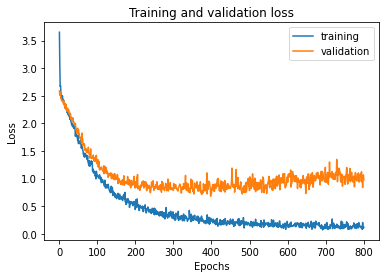

In [ ]:
x_axis = np.arange(1, len(history.history['loss'])+1)
plt.plot(x_axis, history.history['loss'], label='training')
plt.plot(x_axis, history.history['val_loss'], label='validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

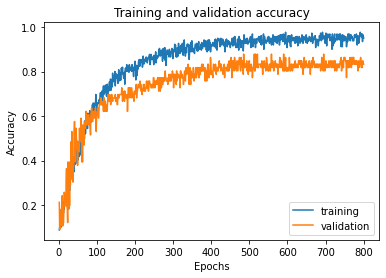

In [ ]:
x_axis = np.arange(1, len(history.history['accuracy'])+1)
plt.plot(x_axis, history.history['accuracy'], label='training')
plt.plot(x_axis, history.history['val_accuracy'], label='validation')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## Evaluation

In [ ]:
model.evaluate(x_test, y_test_cat)

4/4 [==============================] - 0s 18ms/step - loss: 0.6278 - accuracy: 0.8716


[0.6278017163276672, 0.8715596199035645]

## t-SNE colored by predicted labels

Prediction of labels for the test set:

In [ ]:
y_pred_test = model(x_test).numpy()
y_pred_test = np.argmax(y_pred_test, axis=1)

List of transcriptional identity names:

In [ ]:
y_pred_test_names = [transcrip_id_names[i] for i in y_pred_test]

t-SNE plot:


Text(0, 0.5, 'tsne-two')

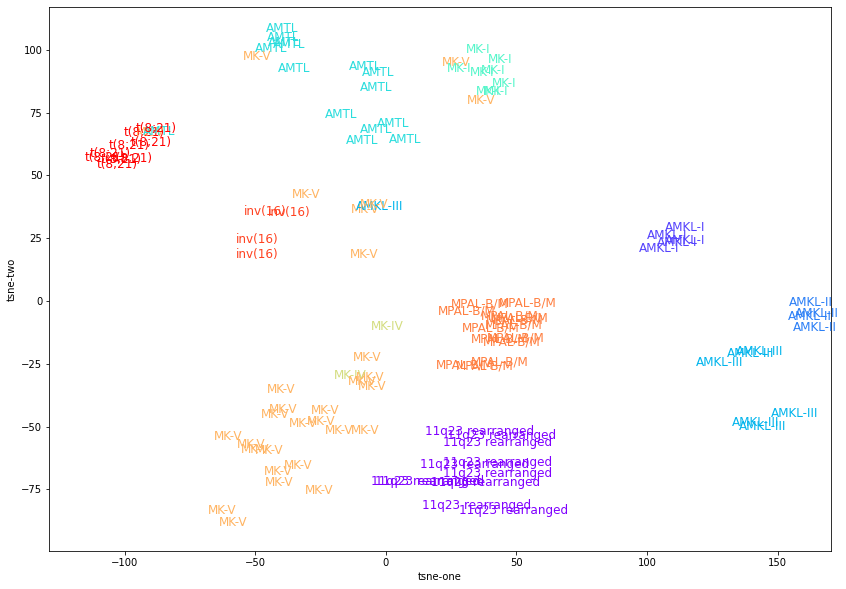

In [ ]:
tsne_res_x_test = tsne_res['tSNE.x'][ind_shuffle][train_size:]
tsne_res_y_test = tsne_res['tSNE.y'][ind_shuffle][train_size:]

fig = plt.figure(figsize=(14,10))
plt.scatter(tsne_res_x_test, tsne_res_y_test, marker='None')
#plt.scatter(tsne_res_x_test, tsne_res_y_test, color=colors(y_pred_test))

for i, id in enumerate(y_pred_test_names):
    where = np.where(transcrip_id_names==id)[0][0]
    plt.annotate(id, (tsne_res_x_test[i], tsne_res_y_test[i]), color=colors(y_pred_test[i]), fontsize=12)
plt.xlabel('tsne-one')
plt.ylabel('tsne-two')